In [6]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import feature, transform 

In [9]:
def find_center_rings_hough(image, num_rings, rad_range, intensity_thresh, sigma):
    """
    Take angled cut or multiple incremented cuts of image data.

    Parameters
    ----------
    image : ndarray
        Image data
    num_rings : int
        Number of candidate circles to be searched for
    rad_range : array
        The min, max, and increment for range of candidate radii to be searched
    intensity_thresh : array
        Min and max of intensity to be used in canny filter
    sigma : float
        Standard deviation applied in canny filter
    v_range : array
        Min and max for matplotlib colormap

    Returns
    -------
    center :list
        Center coordinates of candidate circles as (x,y) tuples
    radii: array
        radii of the candidate circles

    """
    low_thresh, hi_thresh = intensity_thresh
    sigma = sigma
    edges = feature.canny(image, sigma, low_threshold= low_thresh, high_threshold= hi_thresh)

    # Range of possible radii
    hough_radii = np.arange(*rad_range)
    hough_res = transform.hough_circle(edges, hough_radii)

    # Selects the most prominent circles, up to num_rings
    accums, cx, cy, radii = transform.hough_circle_peaks(hough_res, hough_radii,
                                               total_num_peaks=num_rings)

    centers = [(cx[i], cy[i]) for i in range(len(radii))]
    return centers, radii

In [16]:
def draw_rings(image, centers, radii, v_range = None):
    import matplotlib.patches as mpatches
    fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 4))
    for i in range(len(radii)):
        ax.scatter(centers[i][0], centers[i][1], s =20, c = 'red')
        circ = mpatches.Circle((centers[i][0], centers[i][1]), radii[i], facecolor='none', edgecolor='r', lw = 2)
        ax.add_artist(circ)
    if v_range != None:
        ax.imshow(image, cmap="viridis", vmin = v_range[0], vmax = v_range[1])
    else:
        ax.imshow(image, cmap="viridis")
    plt.show()


## Ex 1:

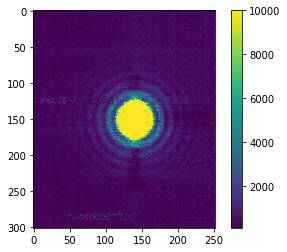

In [7]:
Z1 = np.load("rough_signal.npy")
fig, ax = plt.subplots()
im = plt.imshow(Z1, vmin  = .01e4, vmax = 1e4)
cbar = fig.colorbar(im)

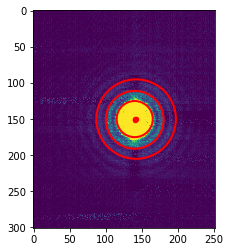

In [17]:
centers1, rad1 = find_center_rings_hough(Z1, num_rings = 3, rad_range = [20, 100, 5], intensity_thresh = [30, 900], sigma = 3) 
draw_rings(Z1, centers1, rad1, v_range = [.01e4,1e4])

## Ex 2:
#### Hough transform also applies to incomplete circles, the parameters allow for a wide range of manipulation to select for positioning of circles

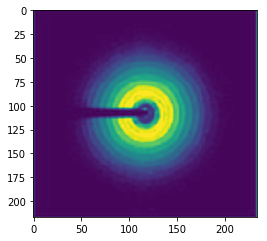

In [12]:
from PIL import Image

im_frame = Image.open('incomplete_circle.png').convert("L")
np_frame = np.array(im_frame)
Z2 = np_frame[5:, :]

fig, ax = plt.subplots(1,figsize=(4,4))
im = ax.imshow(Z2, vmin = 20, vmax = 224, cmap = "viridis")#cmap='inferno')

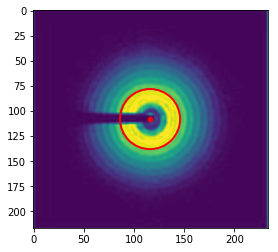

In [18]:
centers2, rad2 = find_center_rings_hough(image = Z2, num_rings = 1, rad_range = [30, 70, 2], intensity_thresh = [150, 200], sigma = .1)
draw_rings(Z2, centers2, rad2, v_range = [20, 224])

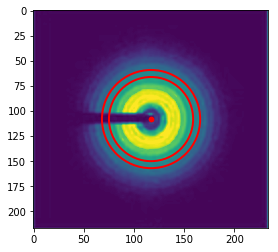

In [20]:
centers3, rad3 = find_center_rings_hough(image = Z2, num_rings = 2, rad_range = [40, 70, 1], intensity_thresh = [30, 100], sigma = .1)
draw_rings(Z2, centers3, rad3, v_range = [20, 224])